In [1]:
import optforge as of
from optforge.benchmarks.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np
import pygmo as pg

inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\VOBench\notebooks\affine\A.jpeg")[:,:,0]

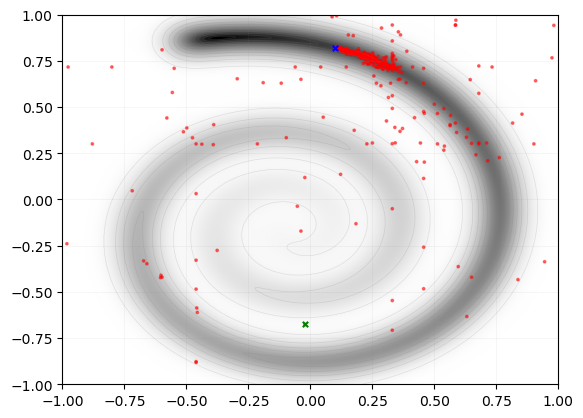

In [23]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

class Objective:
    def fitness(self, x):
        return [vob.step_noline(x)]

    def get_bounds(self):
        return ([-1,-1],[1,1])

prob = pg.problem(Objective())
pop = pg.population(prob, size = 7)
algo = pg.algorithm(pg.sade(gen = int(1000/7)))
pop = algo.evolve(pop)

vob.plot()

evals: 1000/1000 | best value: 0.0196                            
Job finished in 0.3s., did 1000 evaluations.


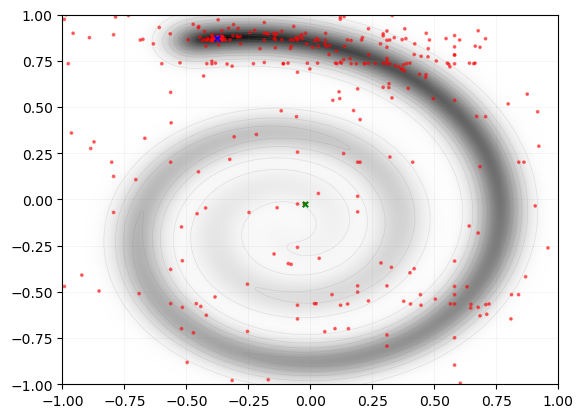

In [33]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.PygmoOptimizer(lambda:pg.sade(gen = 1), 7)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1),
)

vob.plot()

evals: 1000/1000 | best value: 0.0390                            
Job finished in 0.4s., did 1000 evaluations.


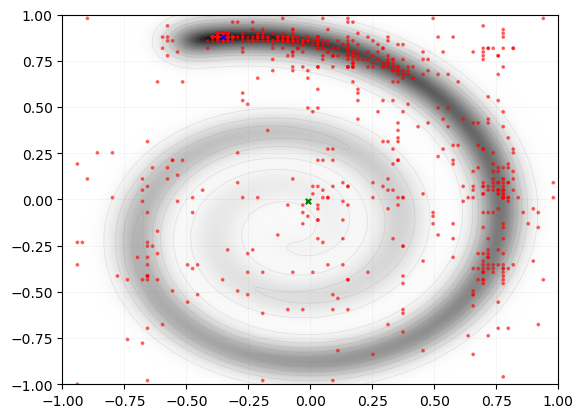

In [24]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

def objective(trial: of.Trial):
    xy = trial.suggest_categorical_array('xy', 2, np.linspace(-1, 1, 100), one_hot=False)
    return vob.step_noline(np.array(xy))

optimizer = of.integrations.PygmoOptimizer(lambda:pg.sade(gen = 1), 10)

study = of.minimize_trial_func(
    objective,
    optimizer,
    max_evals = 1000,
)
vob.plot()

evals: 2070/1000 | best value: 0.0201                            
Job finished in 1.1s., did 2070 evaluations.


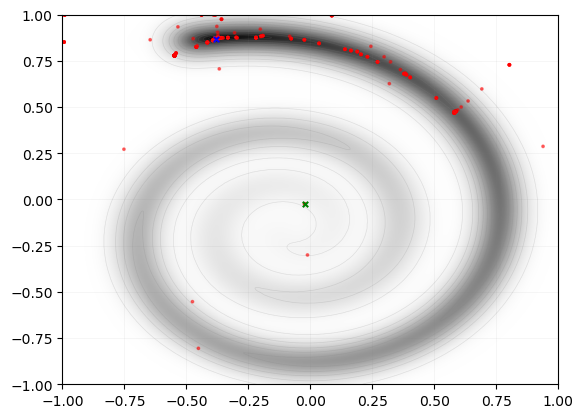

2070 2070


In [3]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.PygmoOptimizer(lambda:pg.ipopt(), 7)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1),
)

vob.plot()
print(study.current_eval, vob.current_step) # Why does it do 2070 evals?????????